In [82]:
import numpy as np
import torchvision.transforms as transforms


In [212]:
filename = 'vpu8a-00000659.png'

In [4]:
path = 'SixCamTrue/'

In [5]:
from PIL import Image, ImageOps

In [223]:
left = Image.open(path+'left_1/'+filename)
right = Image.open(path+'left_2/'+filename)

In [224]:
depth = Image.open(path+'depth/'+filename)

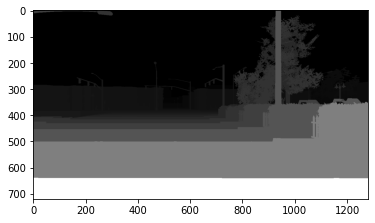

In [225]:
d = np.array(depth)
distance = (d[:, :, 3] +  d[:, :, 2] * 256 + d[:, :, 1] * 256 * 256) / (256 * 256 * 256 - 1) * 1000  # distance in meter
imgplot = plt.imshow(1/distance, cmap='gray')

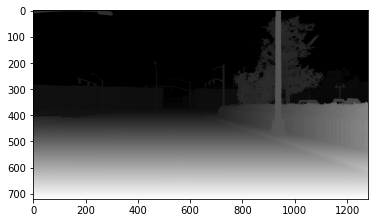

In [238]:
d = np.ascontiguousarray(depth, dtype=np.float32)
distance = (d[:, :, 2]*256*256 +  d[:, :, 1] * 256 + d[:, :, 0]) / (256 * 256 * 256 - 1) * 1000
disparity = 1/distance
imgplot = plt.imshow(disparity, cmap='gray')

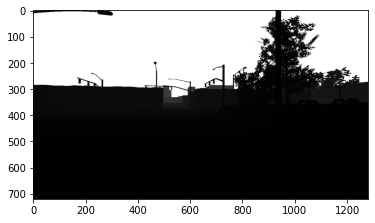

In [268]:
imgplot = plt.imshow(distance, cmap='gray')

In [267]:
distance

array([[999.99970198, 999.99970198, 999.99970198, ..., 999.99970198,
        999.99970198, 999.99970198],
       [999.99970198, 999.99970198, 999.99970198, ..., 999.99970198,
        999.99970198, 999.99970198],
       [999.99970198, 999.99970198, 999.99970198, ..., 999.99970198,
        999.99970198, 999.99970198],
       ...,
       [  3.05992383,   3.05992383,   3.05992383, ...,   3.06344051,
          3.06344051,   3.06344051],
       [  3.05134076,   3.05140037,   3.05140037, ...,   3.05485744,
          3.05485744,   3.05485744],
       [  3.0428769 ,   3.0428769 ,   3.0428769 , ...,   3.04633397,
          3.04633397,   3.04633397]])

In [228]:
left_array = transforms.ToTensor()(left.convert('RGB'))
right_array = transforms.ToTensor()(right.convert('RGB'))

In [269]:
right = Image.open(path+'right_cam/'+filename)
right_array = transforms.ToTensor()(right.convert('RGB'))

shift = right_array.clone()

C, H, W = shift.shape

# shift[:,:,:] = 0

K = 200
ss = K * disparity

ss = distance / 2

for i in range(H):
    for j in range(W):
        shift[0, i, j] = int(ss[i,j])
#         s = ss[i,j]
#         jj = int(j-s)
#         if jj >= 0:
#             shift[:,i,jj] = left_array[:,i,j]

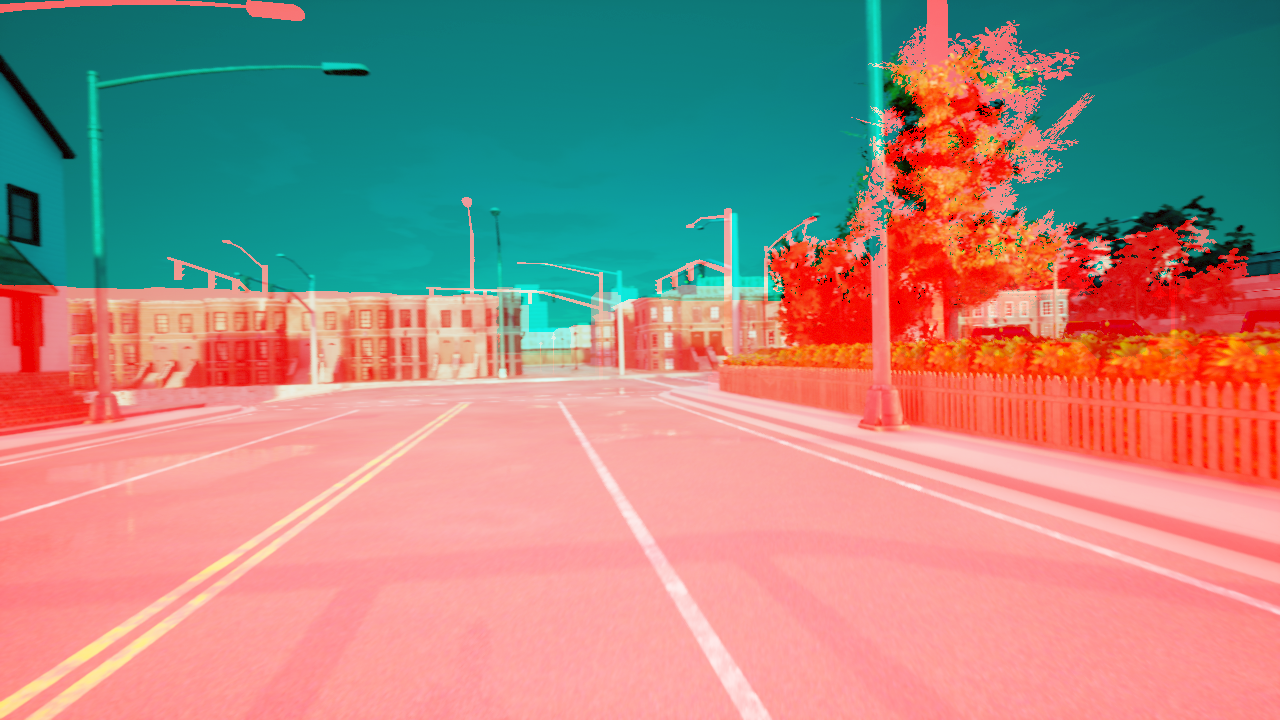

In [271]:
transforms.ToPILImage()(shift)

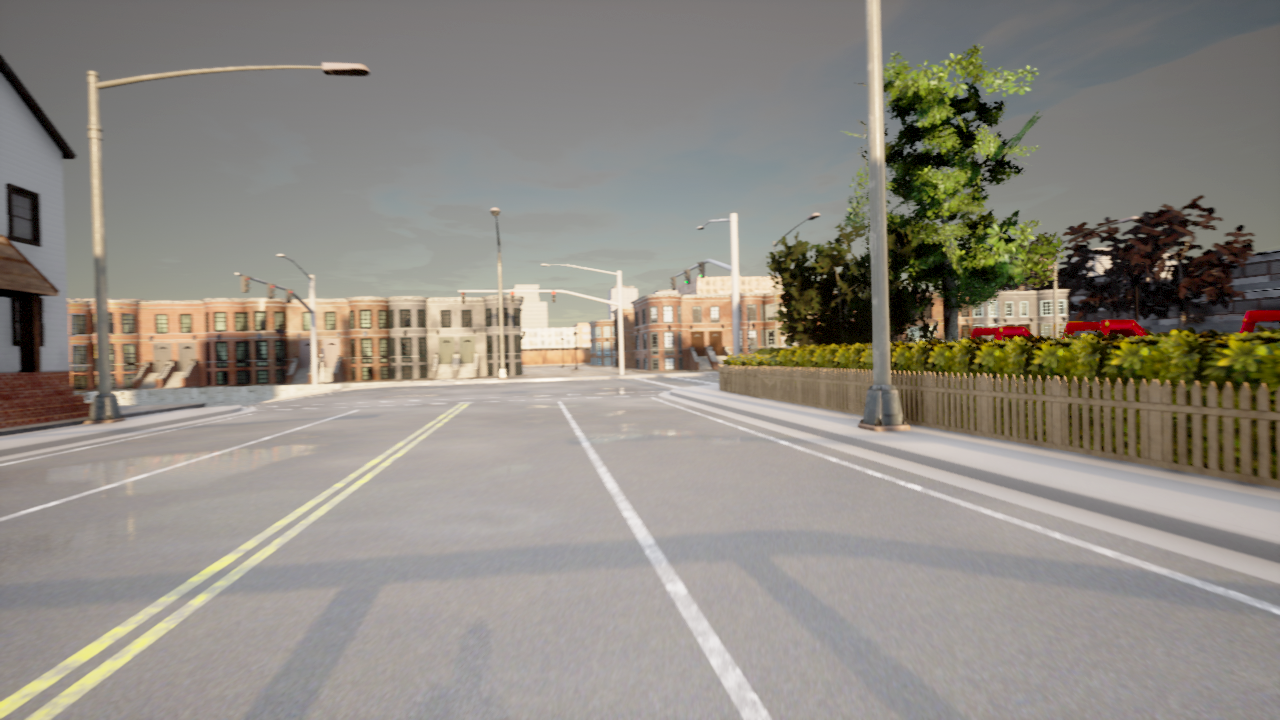

In [262]:
right

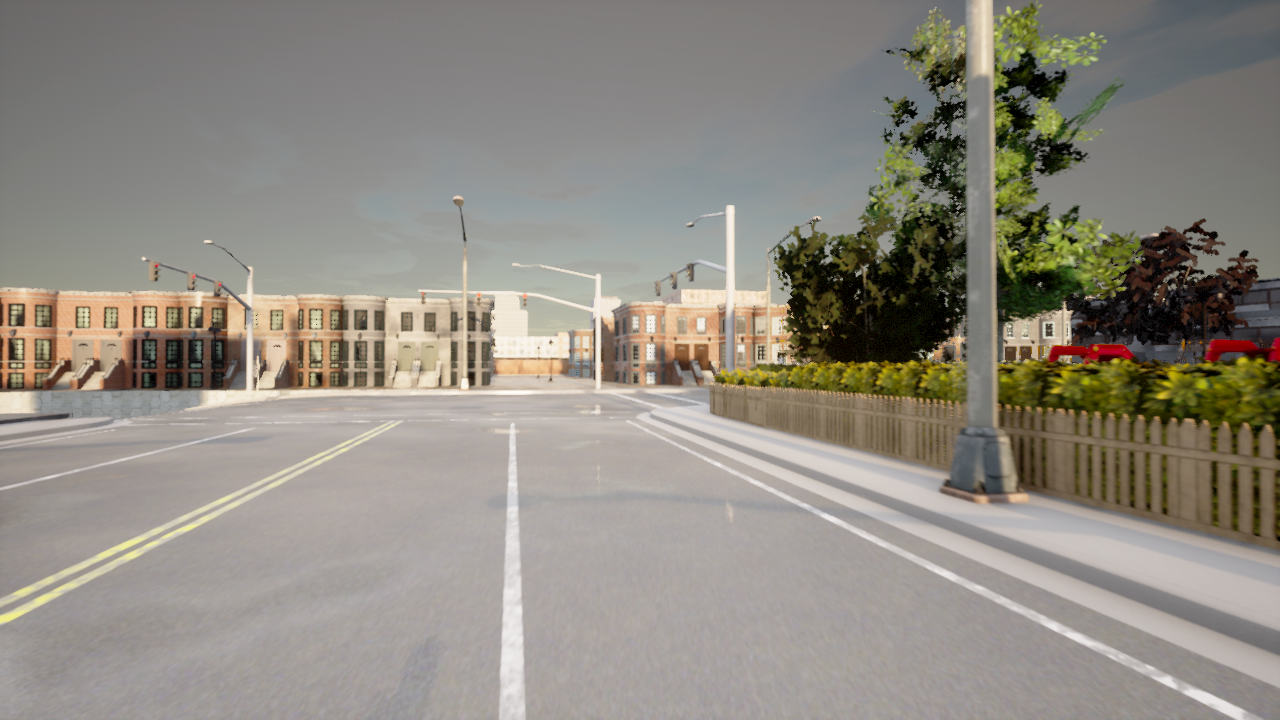

In [246]:
left

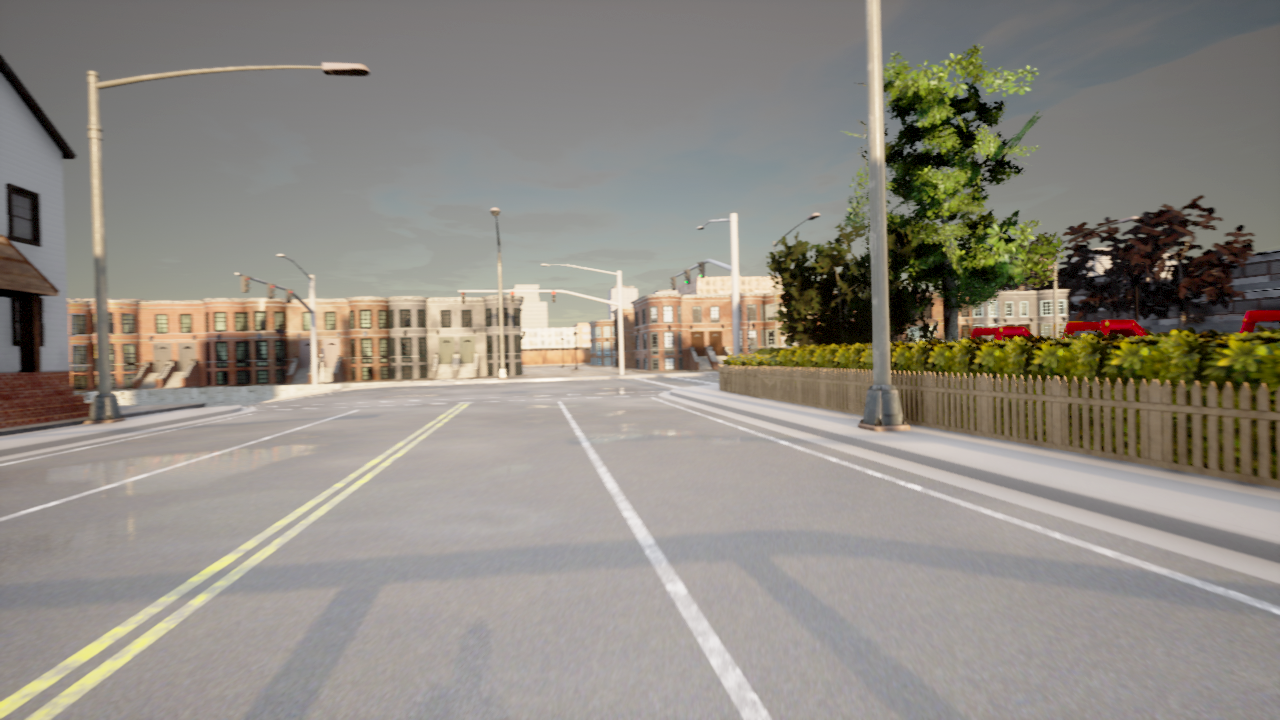

In [242]:
Image.open(path+'right_cam/'+filename)